<a href="https://colab.research.google.com/github/pswoo0323/2023.AI/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EC%A0%95%EA%B7%9C%ED%99%94_test2(%EB%B0%98%EB%8F%84%EC%B2%B4%EB%B6%88%EB%9F%89%ED%8C%90%EB%8B%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/qa.txt', names=['t1','t2','Passed'])
print(data)

X = np.c_[data['t1'], data['t2']]
y = data['Passed']
m = len(data)

Mounted at /content/drive
           t1        t2  Passed
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
..        ...       ...     ...
113 -0.720620  0.538740       0
114 -0.593890  0.494880       0
115 -0.484450  0.999270       0
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0

[118 rows x 3 columns]


In [ ]:
print(X.shape,y.shape)

(118, 2) (118,)


In [ ]:
pos = []
neg = []

for(i,val)in enumerate(y):
  if val==1:
    pos.append(i)
  else:
      neg.append(i)
print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


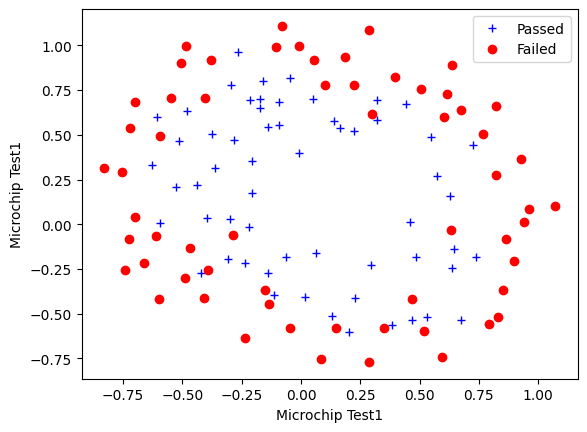

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1),'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1),'ro', label='Failed')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test1")
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])
print(X_poly[0].shape)

[0.051267 0.69956 ]
[0.051267   0.69956    0.00262831 0.03586434 0.48938419]
(5,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 6
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0].shape)

[0.051267 0.69956 ]
(27,)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2',solver='liblinear',C=1e-1)
log_reg.fit(X_poly , y)

LogisticRegression(C=0.1, solver='liblinear')

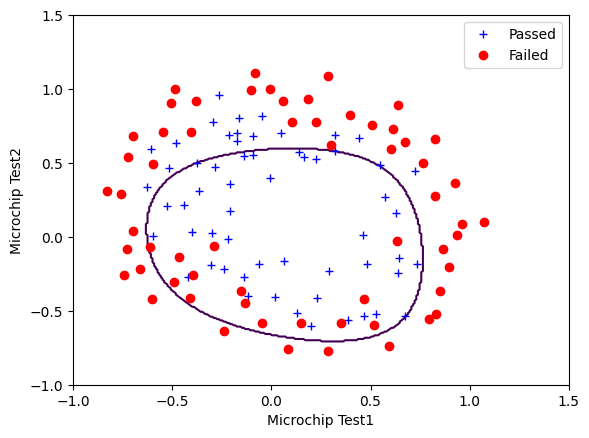

In [ ]:
u = np.linspace(-1,1.5, 300)
v = np.linspace(-1,1.5, 300)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
  a=[]
  for j in range(len(v)):
    a.append(np.array([u[i],v[j]]))

  my_data = poly_features.fit_transform(a)
  z[i]=log_reg.predict(my_data)
plt.contour(u,v,z,0)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1),'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1),'ro', label='Failed')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.legend(loc='upper right')
plt.show()

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0]
[[46 14]
 [16 42]]


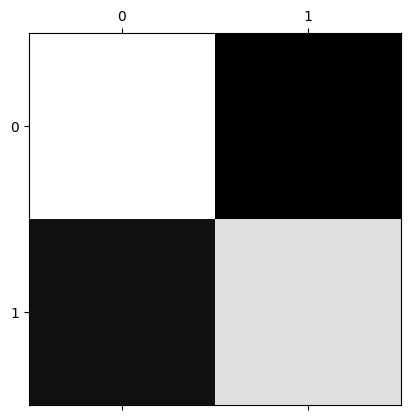

precision_score:,precision_score(y,y_pred)
recall_score:, recall_score(y,y_pred)
F1_score: 0.736842105263158


In [ ]:
y_pred=log_reg.predict(X_poly)
print(y_pred)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
plt.matshow(conf_mat, cmap = plt.cm.gray)
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score:,precision_score(y,y_pred)")
print("recall_score:, recall_score(y,y_pred)")

from sklearn.metrics import f1_score
print("F1_score:",f1_score(y,y_pred))

In [ ]:
y_scores = log_reg.decision_function(X_poly)
print(y_scores)

[ 0.05721229  0.09031196  0.08026682  0.17053879  0.12428068  0.12804255
  0.15762518  0.13103297  0.10611841  0.05698076 -0.02303367 -0.08009722
 -0.08781319 -0.21166892 -0.03087887  0.07336408  0.15980733 -0.10426686
  0.07493999  0.06340612  0.01223171  0.06483144  0.05088184  0.06692669
  0.09972027  0.0039081  -0.04642661 -0.2288355   0.19104147 -0.04422837
 -0.48582731 -0.06976624  0.12417891  0.20140773  0.20043654  0.18558606
  0.14110412  0.17216763  0.17914447  0.08748364  0.12938355  0.05788662
 -0.07524136  0.10212642 -0.03704723  0.00922225 -0.25399059  0.14984191
 -0.08845407 -0.03267549  0.14628497  0.23248708  0.18795328  0.2312281
  0.22583701  0.16968366  0.19363608  0.13978443 -0.47339273 -0.11374384
  0.05569444 -0.27770043 -0.3643466  -0.1778768  -0.37102315 -0.73725405
 -0.39571626 -0.78450463 -0.69486198 -0.46788667 -0.5786725  -0.48962111
 -0.49382144 -0.4376614  -0.27751262 -0.10992105  0.0029229  -0.01829043
 -0.13858015 -0.09891484  0.02217236  0.07687025  0.

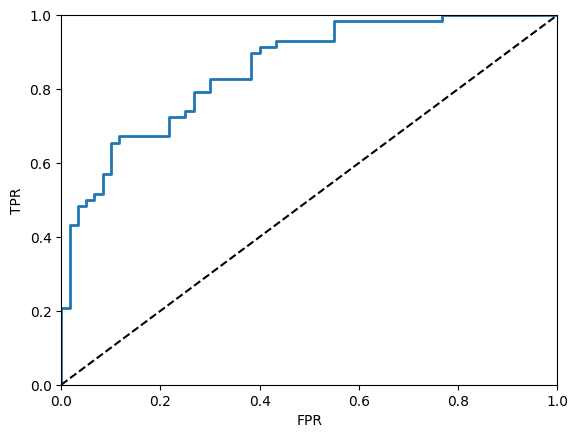

roc_auc_score: 0.8554597701149426


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,y_scores)

def plot_roc_curve(fpr,tpr,label = None):
  plt.plot(fpr,tpr,linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('FPR')
  plt.ylabel('TPR')
plot_roc_curve(fpr,tpr)
plt.show()

from sklearn.metrics import roc_auc_score
print("roc_auc_score:", roc_auc_score(y,y_scores))